Instalar e importar librerías

In [1]:
%pip install pandas seaborn nltk scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
import statistics
from sklearn.metrics import classification_report

Importar, explorar y limpiar Dataset

In [3]:
df = pd.read_csv('Emotion_final.csv', sep=',', encoding='utf-8')
df.head(10)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,happy
9,i feel romantic too,love


### Exploración de los datos

In [4]:
print(df.describe(), '\n')
print(df.isna().sum())

                                                     Text Emotion
count                                               21459   21459
unique                                              21405       6
top     i feel more adventurous willing to take risks ...   happy
freq                                                    2    7029 

Text       0
Emotion    0
dtype: int64


<Axes: xlabel='Emotion', ylabel='count'>

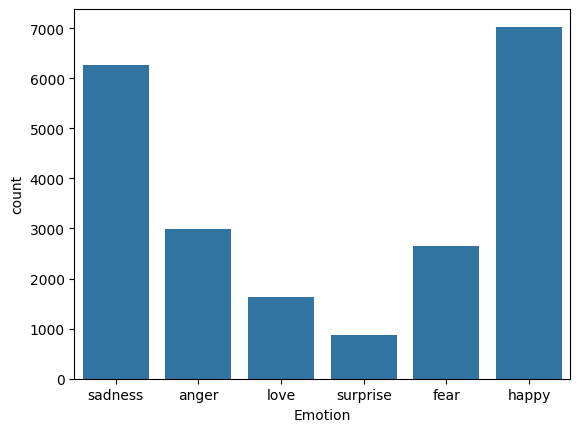

In [5]:
sns.countplot(x=df['Emotion'])

### Procesar Texto

In [6]:
nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

#mantiene las negaciones, ya que pueden influir en casos de emociones negadas
#negaciones = {"not", "no", "nt", "never", "none", "nobody", "neither", "nor", "nothing", "nowhere", "without"}
#stop_words = stop_words-negaciones


def procesar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r' http\S+| www\S+| href\S+| src\S+', '', texto) #elimina enlaces
    texto = re.sub(r' http+| www+| href+| src+', '', texto) #elimina palabras sin sentido de enlaces
    texto = re.sub(r'@[\w]+','', texto) #elimina menciones de usuario
    texto = re.sub(r'#\w+','', texto) #elimina hashtags
    texto = re.sub(r'[^a-záéíóúüñ\s]','', texto) #elimina palabras tildadas o caracteres especiales
    
    words = texto.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    processed_texto = ' '.join(words)
    return processed_texto

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Play\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df["texto_procesado"] = df['Text'].apply(procesar_texto)
df

,Text,Emotion,texto_procesado
0,i didnt feel humiliated,sadness,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,feel grouchi
...,...,...,...
21454,Melissa stared at her friend in dism,fear,melissa stare friend dism
21455,Successive state elections have seen the gover...,fear,success state elect seen govern parti pummel d...
21456,Vincent was irritated but not dismay,fear,vincent irrit dismay
21457,Kendall-Hume turned back to face the dismayed ...,fear,kendallhum turn back face dismay coup


In [8]:
target_idx = []
target_emotions = []
for idx, emocion in enumerate(df['Emotion'].unique()):
    target_idx.append(idx)
    target_emotions.append(emocion)

print(target_idx)
print(target_emotions)

df['Emotion'] = df['Emotion'].apply(lambda emotion: target_emotions.index(emotion))
df

[0, 1, 2, 3, 4, 5]
['sadness', 'anger', 'love', 'surprise', 'fear', 'happy']


,Text,Emotion,texto_procesado
0,i didnt feel humiliated,0,didnt feel humili
1,i can go from feeling so hopeless to so damned...,0,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,1,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,2,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,1,feel grouchi
...,...,...,...
21454,Melissa stared at her friend in dism,4,melissa stare friend dism
21455,Successive state elections have seen the gover...,4,success state elect seen govern parti pummel d...
21456,Vincent was irritated but not dismay,4,vincent irrit dismay
21457,Kendall-Hume turned back to face the dismayed ...,4,kendallhum turn back face dismay coup


In [ ]:
vectorizer = CountVectorizer(max_features = 10000)
vectorizer.fit(df["texto_procesado"])
X_train, X_test, y_train, y_test = train_test_split(df[["texto_procesado"]], df["Emotion"], test_size=0.20, random_state=42)
X_train_counts = vectorizer.transform(X_train["texto_procesado"])
X_test_counts = vectorizer.transform(X_test["texto_procesado"])
X_train_counts

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 140662 stored elements and shape (16094, 10000)>

In [10]:
print(X_train_counts)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 140662 stored elements and shape (16094, 10000)>
  Coords	Values
  (0, 174)	1
  (0, 2451)	1
  (0, 2796)	1
  (0, 8320)	1
  (1, 34)	1
  (1, 737)	1
  (1, 2451)	1
  (1, 5245)	1
  (1, 7261)	1
  (1, 7890)	1
  (1, 8024)	1
  (1, 8707)	1
  (2, 729)	1
  (2, 1510)	1
  (2, 2280)	1
  (2, 2451)	1
  (2, 2851)	1
  (2, 3895)	1
  (2, 3919)	1
  (2, 5111)	1
  (2, 5167)	1
  (2, 8600)	1
  (3, 56)	1
  (3, 409)	1
  (3, 1358)	1
  :	:
  (16090, 3264)	1
  (16090, 3475)	1
  (16090, 3785)	1
  (16090, 3933)	2
  (16090, 4831)	1
  (16090, 6994)	1
  (16090, 7499)	1
  (16090, 7607)	1
  (16090, 8504)	1
  (16090, 9207)	1
  (16090, 9754)	2
  (16090, 9890)	2
  (16090, 9948)	1
  (16091, 1480)	1
  (16091, 2451)	1
  (16092, 2451)	1
  (16092, 5058)	1
  (16092, 8837)	1
  (16092, 8907)	1
  (16093, 2451)	1
  (16093, 6095)	1
  (16093, 8461)	1
  (16093, 8907)	1
  (16093, 9274)	1
  (16093, 9898)	1


### Evaluar Rendimiento

In [13]:
multiNB = MultinomialNB()

#Utilizando Cross validation
cv_results = cross_validate(multiNB, X_train_counts, y_train, cv=4, scoring=['f1_weighted', 'accuracy'])
print("f1 prom: ", cv_results['test_f1_weighted'].mean())
print("Accuracy prom: ", cv_results['test_accuracy'].mean())

f1 prom:  0.7248364877634964
Accuracy prom:  0.7482284703412634


In [17]:
multiNB = MultinomialNB()
multiNB.fit(X_train_counts, y_train)
y_pred_multiNM = multiNB.predict(X_test_counts)
print(classification_report(y_test, y_pred_multiNM, target_names=target_emotions))

              precision    recall  f1-score   support

     sadness       0.77      0.90      0.83      1625
       anger       0.88      0.67      0.76       764
        love       0.78      0.36      0.49       396
    surprise       0.71      0.18      0.29       204
        fear       0.81      0.64      0.71       661
       happy       0.74      0.91      0.81      1715

    accuracy                           0.77      5365
   macro avg       0.78      0.61      0.65      5365
weighted avg       0.78      0.77      0.76      5365

